In [1]:
import numpy as np
import matplotlib
#matplotlib.use("agg");
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sys

In [71]:
font = {'family':'sans-serif','weight':'normal','size':15};
matplotlib.rc('font',**font);
data=pd.read_csv("paretoregenDc.txt", sep=',',header =None,names=['Cost','DoC','MassConsumed','HDPE','LDPE','PP','PLA','PHA','Paper','Reprocess',     'Pyrolysis','Landfill','Incineration','GWP'])
database=pd.read_csv("paretobase.txt", sep=',',header =None,names=['Cost','DoC','MassConsumed','HDPE','LDPE','PP','PLA','PHA','Paper','Reprocess',     'Pyrolysis','Landfill','Incineration','GWP']) 
dataellen=pd.read_csv("paretoEllenMc.txt", sep=',',header =None,names=['Cost','DoC','MassConsumed','HDPE','LDPE','PP','PLA','PHA','Reprocess',     'Pyrolysis','Landfill','Incineration','GWP']) 
datanocap=pd.read_csv("paretoNoCaps.txt", sep=',',header =None,names=['Cost','DoC','MassConsumed','HDPE','LDPE','PP','PLA','PHA','Reprocess',     'Pyrolysis','Landfill','Incineration','GWP']) 
database=database.sort_values(by='DoC', ascending=True)
dataellen=dataellen.sort_values(by='DoC', ascending=True)
datanocap=datanocap.sort_values(by='DoC', ascending=True)
data

,Cost,DoC,MassConsumed,HDPE,LDPE,PP,PLA,PHA,Paper,Reprocess,Pyrolysis,Landfill,Incineration,GWP
0,0.7881,0.5937,3.9534,0.0000,0.0419,0.0000,3.9115,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,2.7976
1,1.1245,0.6002,0.7200,0.0000,0.7136,0.0000,0.0064,0.0,0.0000,0.4764,0.0000,0.0000,0.0000,2.7976
2,1.1245,0.6002,0.7200,0.0000,0.7136,0.0000,0.0064,0.0,0.0000,0.4764,0.0000,0.0000,0.0000,2.7976
3,1.1245,0.6002,0.7200,0.0000,0.7136,0.0000,0.0064,0.0,0.0000,0.4764,0.0000,0.0000,0.0000,2.7976
4,1.1245,0.6002,0.7200,0.0000,0.7136,0.0000,0.0064,0.0,0.0000,0.4764,0.0000,0.0000,0.0000,2.7976
5,0.7881,0.2127,1.0052,0.0000,0.6544,0.0000,0.3509,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,2.9485
6,3.1506,0.9056,3.2743,0.0000,0.4413,0.0000,0.0000,0.0,2.8330,1.5094,0.6647,0.7967,0.0000,21.8485
7,3.7891,0.9136,3.5865,0.0000,0.3611,0.0000,0.0000,0.0,3.2254,2.3731,0.0000,0.0000,0.0000,21.8485
8,3.7891,0.9136,3.5865,0.0000,0.3611,0.0000,0.0000,0.0,3.2254,2.3731,0.0000,0.0000,0.0000,21.8485
9,3.7891,0.9136,3.5865,0.0000,0.3611,0.0000,0.0000,0.0,3.2254,2.3731,0.0000,0.0000,0.0000,21.8485


In [18]:
x = data['Cost'];
y = data['GWP'];
z = data['DoC'];
x0 = database['Cost'];
y0= database['GWP'];
z0 = database['DoC'];
x1 = dataellen['Cost'];
y1 = dataellen['GWP'];
z1 = dataellen['DoC'];
x2 = datanocap['Cost'];
y2 = datanocap['GWP'];
z2 = datanocap['DoC'];
maximumval=max((y0.append(y1)).append(y2))


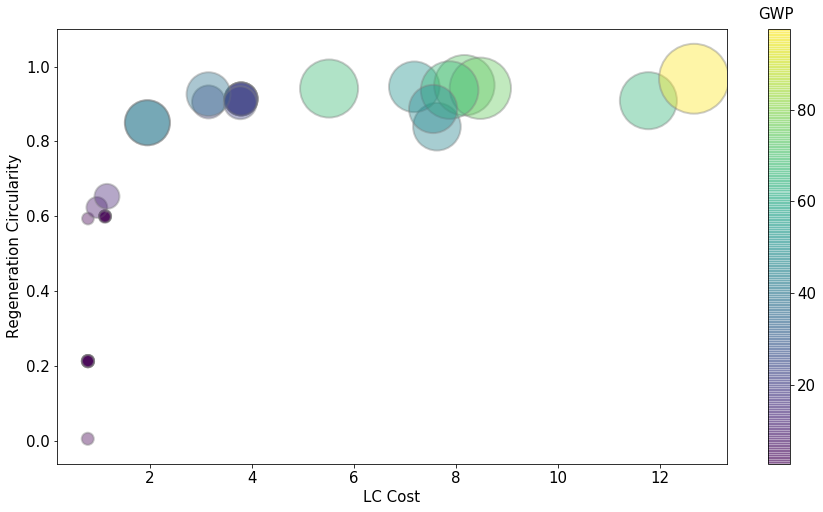

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.scatter(x, z, s=y*50, c=y, cmap="viridis", alpha=0.4, edgecolors="grey", linewidth=2, label=y)
plt.xlabel("LC Cost")
plt.ylabel("Regeneration Circularity")
plt.colorbar().set_label('GWP', labelpad=-40, y=1.05, rotation=0)
plt.show()

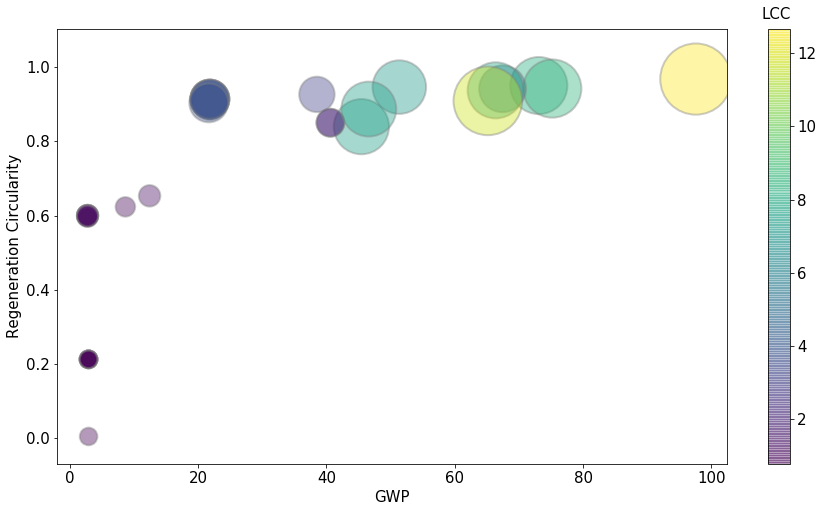

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.scatter(y, z, s=x*400, c=x, cmap="viridis", alpha=0.4, edgecolors="grey", linewidth=2, label=y)
plt.xlabel("GWP")
plt.ylabel("Regeneration Circularity")
plt.colorbar().set_label('LCC', labelpad=-40, y=1.05, rotation=0)
plt.show()

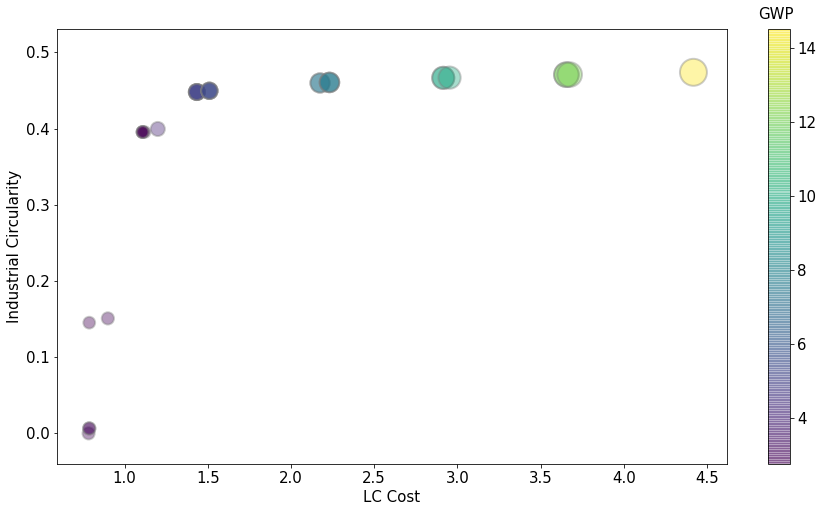

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.scatter(x0, z0, s=y0*50, c=y0, cmap="viridis", alpha=0.4, edgecolors="grey", linewidth=2, label=y)
#plt.clim(0,97)
plt.xlabel("LC Cost")
plt.ylabel("Industrial Circularity")
plt.colorbar().set_label('GWP', labelpad=-40, y=1.05, rotation=0)
plt.show()

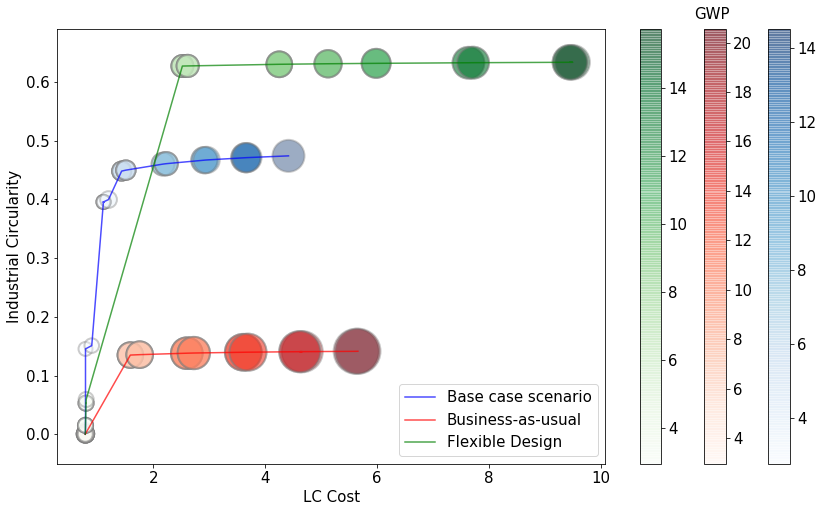

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.scatter(x0, z0, s=y0*100*max(y0)/maximumval, c=y0, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(x0,z0,c="Blue", alpha=0.7, label="Base case scenario")
plt.colorbar(pad=-0.06).set_label('', labelpad=-40, y=1.05, rotation=0)
plt.scatter(x1, z1, s=y1*100*max(y1)/maximumval, c=y1, cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(x1,z1,c="Red", alpha=0.7, label="Business-as-usual")
plt.colorbar(pad=-0.05).set_label('GWP', labelpad=-40, y=1.05, rotation=0)
plt.scatter(x2, z2, s=y2*100*max(y2)/maximumval, c=y2, cmap="Greens", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(x2,z2,c="Green", alpha=0.7, label="Flexible Design")
plt.colorbar(pad=0.05).set_label('', labelpad=-40, y=1.05, rotation=0)
plt.xlabel("LC Cost")
plt.ylabel("Industrial Circularity")
plt.legend()
plt.show()

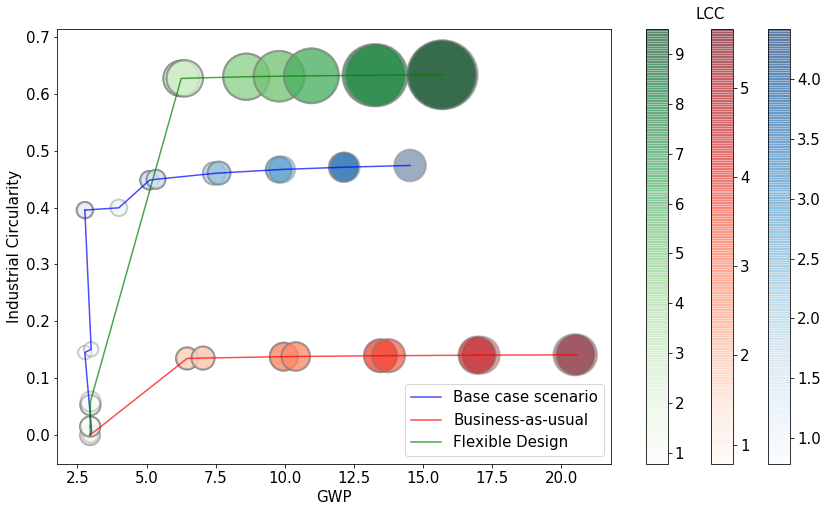

In [60]:
from pylab import rcParams
maximumvalx=max((x0.append(x1)).append(x2))
rcParams['figure.figsize'] = 15, 8
plt.scatter(y0, z0, s=x0*500*max(x0)/maximumvalx, c=x0, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(y0,z0,c="Blue", alpha=0.7, label="Base case scenario")
plt.colorbar(pad=-0.07).set_label('', labelpad=-40, y=1.05, rotation=0)
plt.scatter(y1, z1, s=x1*500*max(x1)/maximumvalx, c=x1, cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(y1,z1,c="Red", alpha=0.7, label="Business-as-usual")
plt.colorbar(pad=-0.05).set_label('LCC', labelpad=-40, y=1.05, rotation=0)
plt.scatter(y2, z2, s=x2*500*max(x2)/maximumvalx, c=x2, cmap="Greens", alpha=0.4, edgecolors="grey", linewidth=2)
plt.plot(y2,z2,c="Green", alpha=0.7, label="Flexible Design")
plt.colorbar(pad=0.05).set_label('', labelpad=40, y=1.05, rotation=0)
plt.xlabel("GWP")
plt.ylabel("Industrial Circularity")
plt.legend()
plt.show()